# Various simulations related to the signature and the randomized signature with sigmoid additions

## Main notebook for simulating and testing

### Mechanism for Brownian Motion

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

C:\Users\vjeko\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from timeit import default_timer as timer

In [3]:
import math


def sigmoid(x):
    return 1 / (1 + math.exp(-x))


sigm_v = np.vectorize(sigmoid)

In [4]:
class Brownian:
    """
    A Brownian motion class constructor
    """

    def __init__(self, x0=0):
        """
        Init class
        """
        assert (
            type(x0) == float or type(x0) == int or x0 is None
        ), "Expect a float or None for the initial value"

        self.x0 = float(x0)

    def gen_random_walk(self, n_step=100):
        """
        Generate motion by random walk

        Arguments:
            n_step: Number of steps

        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print(
                "WARNING! The number of steps is small. It may not generate a good stochastic process sequence!"
            )

        w = np.ones(n_step) * self.x0

        for i in range(1, n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1, -1])
            # Weiner process
            w[i] = w[i - 1] + (yi / np.sqrt(n_step))

        return w

    def gen_normal(self, n_step=100):
        """
        Generate motion by drawing from the Normal distribution

        Arguments:
            n_step: Number of steps

        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print(
                "WARNING! The number of steps is small. It may not generate a good stochastic process sequence!"
            )

        w = np.ones(n_step) * self.x0

        for i in range(1, n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i - 1] + (yi / np.sqrt(n_step))

        return w

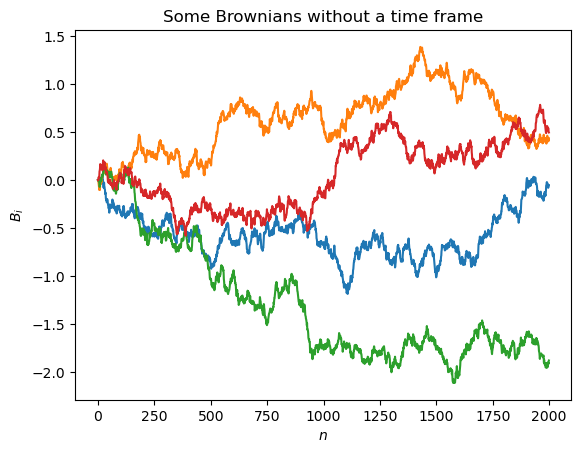

In [5]:
b = Brownian()
for i in range(4):
    plt.plot(1 * b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

### Defining the functions to test later:

In [6]:
id_v = np.vectorize(lambda a: a)
g1 = id_v
sq_v = np.vectorize(lambda a: a * a)
g2 = sq_v
cu_v = np.vectorize(lambda a: a * a * a)
g3 = cu_v
quo_v = np.vectorize(lambda a: 1 / (1 + abs(a)))
g4 = quo_v
sqrt_v = np.vectorize(math.sqrt)
log_v = np.vectorize(math.log)
sin_v = np.vectorize(math.sin)
g5 = sin_v
cos_v = np.vectorize(math.cos)
arctan_v = np.vectorize(np.arctan)
g6 = arctan_v

### Time and step structure

In [7]:
N = 201
T = 1
step = T / N
x_axis = np.linspace(0, T, N)

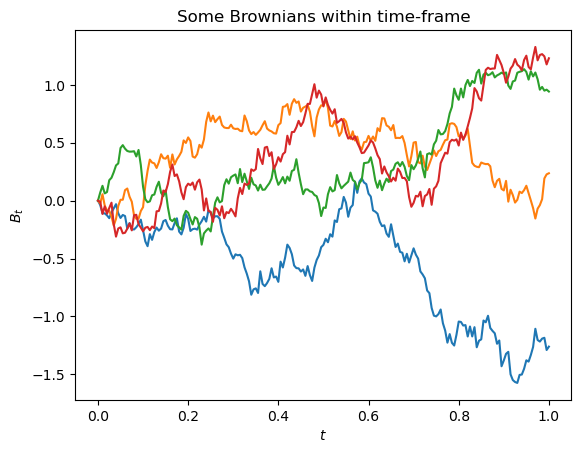

In [8]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(N))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

Let us consider the one-dimensional stochastic Double Well process, given by

\begin{equation}
    dX_t = \theta X_t (\mu - X_t^2)dt + \rho d B_t, \ X_0 = x_0 \in \mathbb{R}, \ t \in [0,1],
\end{equation}

where $B_t$ is a 1-dimensional Brownian motion, and $( \mu, \theta, \rho) \in \mathbb{R} \times \mathbb{R}^+ \times \mathbb{R}^+$.

### Time and step structure

In [9]:
N = 1001
T = 1
step = T / N
x_axis = np.linspace(0, T, N)

### Constructing the Double Well process

In [10]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N + 1)
db = np.diff(brow)

In [11]:
for i in range(N - 1):
    Y[i + 1] = Y[i] + theta * Y[i] * (mu - Y[i] * Y[i]) * step + sigma * db[i]

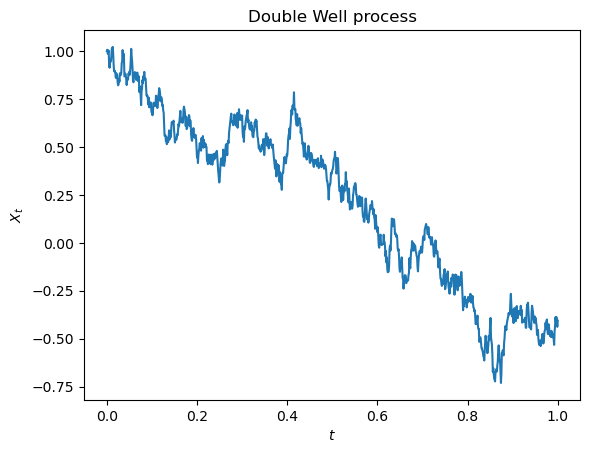

In [12]:
plt.plot(x_axis, Y)
plt.title("Double Well process")
plt.xlabel("$t$")
plt.ylabel("$X_t$")
plt.show()

### Constructing the randomized signature

For any $k \in \mathbb{N}$ big enough and appropriately
chosen random matrices $A_1,...,A_d$ in $\mathbb{R}^{k \times k}$ and random shifts $b_1,...,b_d$ in $\mathbb{R}^{k \times 1}$, and any fixed activation function $\sigma$ (notice that we explicitly allow the identity as a possible choice here), the solution of
\begin{equation}
    d Z_t(X) = \sum_{i=1}^d \sigma (A_iZ_t(X) + b_i)d X^i_t, \; Z_0(X) = (1,0,...,0) \in \mathbb{R}^k, \; t \in [0,T] \label{rand_sig_first}
\end{equation}
is called the randomized signature of $X$.



Here, we initialize $A_i \in \mathbb{R}^{k \times k}, b_i \in \mathbb{R}^k$ to have i.i.d. standard normal entries and set the sigmoid function $\sigma(x) := \frac{1}{1+e^{-x}}$.

In [13]:
k = 30
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1

##### With sigmoid

In [14]:
for i in range(N - 1):
    Z[i + 1] = Z[i] + sigm_v(A @ Z[i] + b) * dY[i]

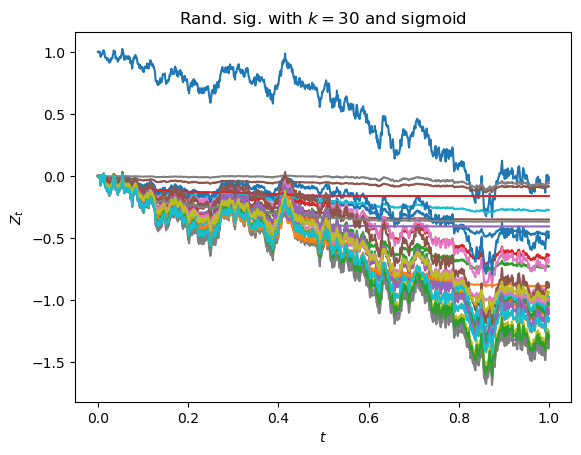

In [15]:
for i in range(30):
    plt.plot(x_axis, Z[:, i])

plt.title("Rand. sig. with $k = 30$ and sigmoid")
plt.xlabel("$t$")
plt.ylabel("$Z_t$")
plt.show()

### Just a sanity check - Training the linear, time-homogeneous readout for just one sample

In [16]:
target_func = g1

In [17]:
target = target_func(Y)

In [18]:
model1 = LinearRegression().fit(Z, target)

In [19]:
r_sq_1 = model1.score(Z, target)
print(f"coefficient of determination: {r_sq_1}")

coefficient of determination: 0.9999999999959555


In [20]:
print(f"intercept: {model1.intercept_}")

intercept: 0.8310575614520175


In [21]:
print(f"coefficients: {model1.coef_}")

coefficients: [ 0.16894346 -0.03833298  0.07218135 -0.04158778  0.57426714  0.13594879
  0.1188525   0.02423999 -0.14538792 -0.17573306 -0.00761096 -0.33608328
  0.11587604  0.03832608  0.1678697   0.14260538  0.10514983  0.08495316
  0.12778518  0.58564161 -0.09385377  0.01335532 -0.09521092 -0.01954712
  0.01053087  0.10612318  0.06434503  0.12286185  0.1064548   0.11231434]


In [22]:
Y_pred_1 = model1.predict(Z)

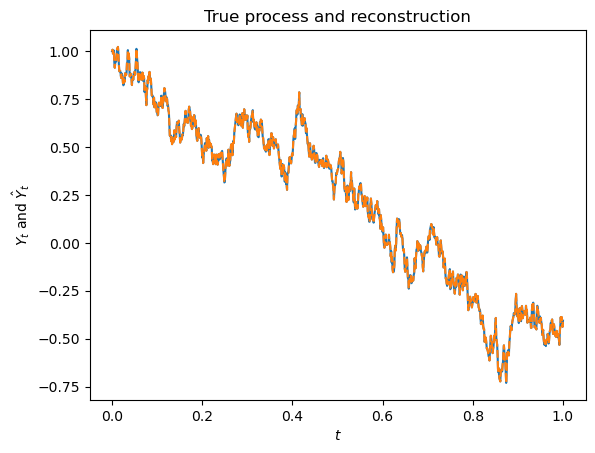

In [23]:
plt.plot(x_axis, target)
plt.plot(x_axis, Y_pred_1, "--")
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample - $g_1$ to $g_6$

First, we define the following functions for a general $x \in \mathbb{R}$:
\begin{align}
     & g_1(x) = x \\ \nonumber
     & g_2(x) = x^2 \\ \nonumber
    & g_3(x) = x^3 \\ \nonumber
    & g_4(x) = \frac{1}{1+|x|} \\ \nonumber
    & g_5(x) = sin(x) \\ \nonumber
    & g_6(x) = arctan(x).
\end{align}

Furthermore, we fix $x_0=1, \mu = 2, \theta = 1, \rho = 1$ for the process and $N_{train}=200, N_{test}=100, N_{steps}=1001, \lambda_{ridge}=0.01$ for the training procedure. We will vary different choices of $k$, the dimension of the randomized signature.

As presented in the theoretical part, the idea is to find a $W \in \mathbb{R}^{1 \times k}$, such that $g_i (X_t) \approx W Z_t, i \in \{1, ..., 6\}$, where $Z_t$ is the $k$-dimensional randomized signature value of $X_t$.

We simulate $X_t$ $N_{train}$ times, compute the corresponding $Z_t$ and create a training set of size $N_{train} \times N_{steps}$ (every time step of every simulation). Then, we train a ridge regression with regularization parameter $\lambda_{ridge}$ between the $Z_t$'s and $g_i(X_t)$'s from the training set.

Finally, we simulate new, unseen $N_{test}$ samples and compare the values of $g_i(X_t)$ and $\hat{g_i}(X_t) := WZ_t$, where $W \in \mathbb{R}^{1 \times k}$ is the learned linear readout via ridge regression. We compute the error in terms of an average relative $L^2$ error over all $N_{test}$ samples. The dimensionality parameter $k$ is varied from the set $\{ 10, 20, 50, 100, 200 \}$. The best performing choice is highlighted in the results.

#### Set the target function:

In [24]:
target_func = g2

#### Set the training parameters:

In [25]:
n_sim = 200
k = 20
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
Y_big = np.zeros(N * n_sim)
target_big = np.zeros(N * n_sim)
Z_big = np.zeros((N * n_sim, k))
Y_big[
    0:N,
] = np.ones(N)
Z_big[
    0:N,
].shape

(1001, 20)

In [26]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N + 1)
    db = np.diff(brow)
    for i in range(N - 1):
        Y[i + 1] = Y[i] + theta * Y[i] * (mu - Y[i] * Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N - 1):
        Z[i + 1] = Z[i] + sigm_v(A @ Z[i] + b) * dY[i]
    Y_big[iter * N : (iter + 1) * N] = Y
    Z_big[iter * N : (iter + 1) * N, :] = Z

    target = target_func(Y)
    target_big[iter * N : (iter + 1) * N] = target

In [27]:
model3 = Ridge(alpha=0.01)
model3.fit(Z_big, target_big)

Ridge(alpha=0.01)

In [28]:
r_sq_3 = model3.score(Z_big, target_big)
print(f"coefficient of determination: {r_sq_3}")

coefficient of determination: 0.9540683534502403


In [29]:
print(f"intercept: {model3.intercept_}")

intercept: -1.2828190384236586


In [30]:
print(f"coefficients: {model3.coef_}")

coefficients: [  2.59892203   2.60738661  11.00636732   0.09277535   3.73727262
 -13.39414996  15.58458227  -8.43499577   5.92670857 -14.09486437
  -0.50742605   6.70351131   2.80298157  -2.17869349   1.32170122
  -4.79292584   0.58895151  -7.94614215  -0.90215578   4.07186945]


#### Set the testing parameters:

In [31]:
n_test = 100

In [32]:
error_list = []
for i_test in range(n_test):
    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N + 1)
    db = np.diff(brow)
    for i in range(N - 1):
        Y[i + 1] = Y[i] + theta * Y[i] * (mu - Y[i] * Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N - 1):
        Z[i + 1] = Z[i] + sigm_v(A @ Z[i] + b) * dY[i]
    target = target_func(Y)
    Y_pred_3 = model3.predict(Z)
    error_list.append(np.linalg.norm(target - Y_pred_3) / np.linalg.norm(target))

### A reconstructed out-of-sample example

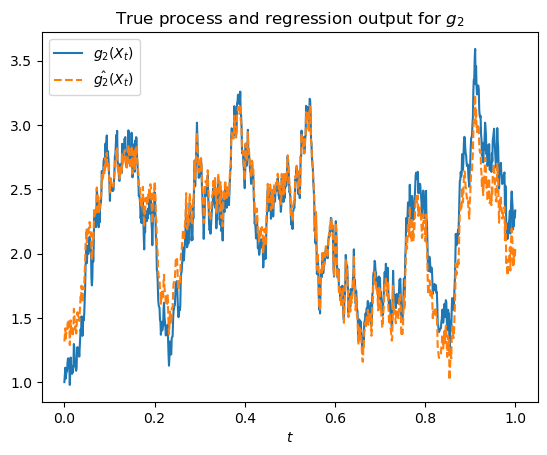

In [36]:
plt.plot(x_axis, target)
plt.plot(x_axis, Y_pred_3, "--")
plt.title("True process and regression output for $g_2$")
plt.xlabel("$t$")
plt.gca().legend(("$g_2(X_t)$", "$\hat{g_2}(X_t)$"))
plt.show()

### The average $L^2$ error

In [34]:
np.mean(error_list)

0.16345664992884645

## 4-Dimensional Ornstein–Uhlenbeck process

### Time and step structure

In [44]:
N = 101
T = 1
step = T / N
x_axis = np.linspace(0, T, N)

We now turn to a multidimensional control setup. We recall that the dynamics of the four-dimensional stochastic Ornstein–Uhlenbeck process is given by

\begin{equation}
    dX_t = (\mu - \Theta X_t)dt + \Sigma d B_t, \ X_0 = x_0 \in \mathbb{R}^4, \ t \in [0,1],
\end{equation}

where $B_t$ is a four-dimensional Brownian motion, and $(\mu,\Theta,\Sigma) \in \mathbb{R}^4 \times \mathbb{R}^{4 \times 4} \times \mathbb{R}^{4 \times 4}$.

### Constructing the  Ornstein–Uhlenbeck  process

In [45]:
y0_4, mu_4 = np.array([1, 1, 1, 1]), np.array([1, 1, 1, 1])
sigma_4 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
theta_4 = np.array(
    [
        [1, 1 / 2, 1 / 3, 1 / 4],
        [2, 1, 2 / 3, 2 / 4],
        [3, 3 / 2, 1, 3 / 4],
        [4, 2, 4 / 3, 1],
    ]
)
Y_4 = np.zeros((N, 4))
Y_4[0] = y0_4
brow_4 = np.zeros((N + 1, 4))
# sigma_4 = theta_4

In [46]:
br_4 = Brownian()

for i in range(4):
    brow_4[:, i] = br_4.gen_normal(N + 1)
db_4 = np.diff(brow_4, axis=0)

In [47]:
for i in range(N - 1):
    Y_4[i + 1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

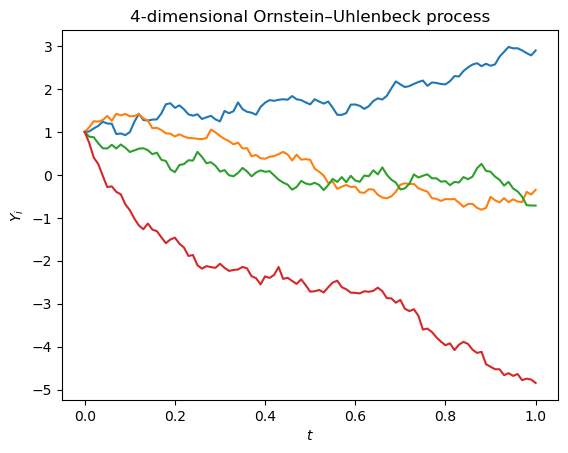

In [48]:
for i in range(4):
    plt.plot(x_axis, Y_4[:, i])

plt.title("4-dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature

For any $k \in \mathbb{N}$ big enough and appropriately
chosen random matrices $A_1,...,A_d$ in $\mathbb{R}^{k \times k}$ and random shifts $b_1,...,b_d$ in $\mathbb{R}^{k \times 1}$, and any fixed activation function $\sigma$ (notice that we explicitly allow the identity as a possible choice here), the solution of

\begin{equation}
    d Z_t(X) = \sum_{i=1}^d \sigma (A_iZ_t(X) + b_i)d X^i_t, \; Z_0(X) = (1,0,...,0) \in \mathbb{R}^k, \; t \in [0,T] \label{rand_sig_first}
\end{equation}

is called the randomized signature of $X$.



In [82]:
k_4 = 30
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4, k_4))
dY_4 = np.diff(Y_4, axis=0)
Z_4 = np.zeros((N, k_4))
Z_4[0][0] = 1

In [50]:
for i in range(N - 1):
    auxiliary = 0
    for j in range(4):
        auxiliary += sigm_v(A_4[j] @ Z_4[i] + b_4[j]) * dY_4[i][j]
    Z_4[i + 1] = Z_4[i] + auxiliary

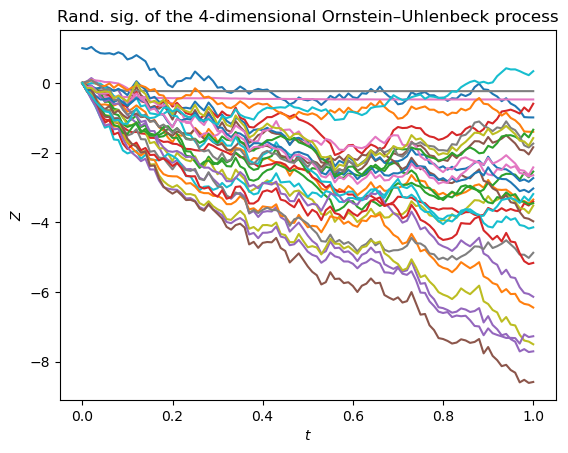

In [51]:
for i in range(k_4):
    plt.plot(x_axis, Z_4[:, i])

plt.title("Rand. sig. of the 4-dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

### Defining the functions to test later:

In [52]:
def first_component(Y):
    return Y[:, 0]

In [53]:
def second_component(Y):
    return Y[:, 1]

In [54]:
def third_component(Y):
    return Y[:, 2]

In [55]:
def fourth_component(Y):
    return Y[:, 3]

In [56]:
def g7(Y):
    return first_component(Y)

In [57]:
def g8(Y):
    return second_component(Y) + third_component(Y)

In [58]:
def g9(Y):
    return np.multiply(first_component(Y), fourth_component(Y))

In [59]:
def g10(Y):
    return sin_v(np.multiply(third_component(Y), third_component(Y)))

In [60]:
def g11(Y):
    return np.multiply(first_component(Y), first_component(Y)) + np.multiply(
        np.multiply(third_component(Y), third_component(Y)), third_component(Y)
    )

In [61]:
def g12(Y):
    return np.multiply(
        np.multiply(second_component(Y), second_component(Y)),
        cos_v(fourth_component(Y)),
    )

### Just a sanity check - Training the linear, time-homogeneous readout for just one sample (4-dimensional)

In [62]:
target_func = g12

In [63]:
target_4 = target_func(Y_4)

In [64]:
model5 = LinearRegression().fit(Z_4, target_4)

In [65]:
r_sq_5 = model5.score(Z_4, target_4)
print(f"coefficient of determination: {r_sq_5}")

coefficient of determination: 0.9891832641488756


In [66]:
print(f"intercept: {model5.intercept_}")

intercept: -0.3292041206685532


In [67]:
print(f"coefficients: {model5.coef_}")

coefficients: [ 8.50081920e-01 -2.54755203e-01  1.64882758e+00 -1.51658058e+00
  6.44890435e-01  2.26326124e+00 -1.14761309e+01  1.62191404e+01
  7.05710673e-01  5.71442666e-01 -2.04048510e-01 -1.88214037e+00
 -1.02936291e+01  8.51256756e+00  9.85868482e+00 -2.11171927e+00
 -1.14934221e+00 -7.89272906e-01  1.13606574e+00  1.41319799e+00
 -1.50370310e+00 -1.56413115e+00  1.34560040e+00  5.45027101e+00
  9.06147337e-01 -5.09699728e+00 -7.35822304e-03 -5.58086314e-01
 -7.79124389e+00 -1.10619050e+00]


In [68]:
Y_pred_5 = model5.predict(Z_4)

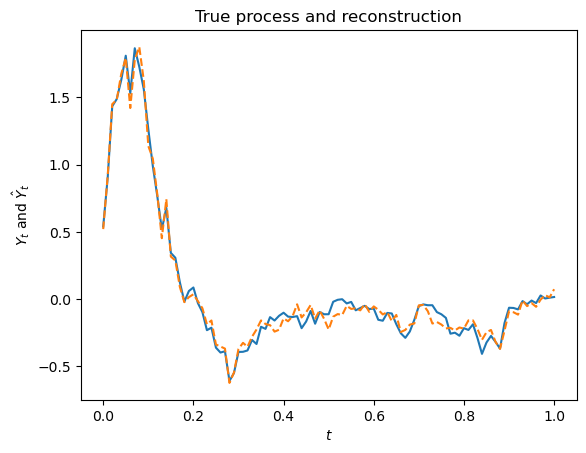

In [69]:
plt.plot(x_axis, target_4)
plt.plot(x_axis, Y_pred_5, "--")
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample with Gaussians - $g_7$ to $g_{12}$

Again, we define the following functions for a general $x = \begin{pmatrix}
x_1\\
x_2\\
x_3\\
x_4
\end{pmatrix} \in \mathbb{R}^4$:
\begin{align}
     & g_7(x) = x_1 \\ \nonumber
     & g_8(x) = x_2 + x_3 \\ \nonumber
    & g_9(x) = x_1 \cdot x_4 \\ \nonumber
    & g_{10}(x) = sin(x_3^2) \\ \nonumber
    & g_{11}(x) = x_1^2+x_3^3 \\ \nonumber
    & g_{12}(x) = x_2^2 \cdot cos(x_4).
\end{align}

We will do an analogous investigation using this process now. Therefore, fix $x_0 = \mathbf{1}, \mu = \mathbf{1}, \Sigma = \mathbb{I}_k, \Theta_{i,j} = i/j$ for the process.

Due to the higher non-triviality of some test functions, we do not try out the same parameter combinations for all of them. Namely, for $g_7$ and $g_8$, we fix $N_{train}=200, N_{test}=100, N_{steps}=101, \lambda_{ridge}=0.01$ vary $k$ from the set $\{10, 20, 50, 100, 200 \}$. For the rest of the functions, we fix $N_{train}=10000, N_{test}=100, N_{steps}=101, \lambda_{ridge}=0.001$ vary $k$ from the set $\{250, 500 \}$.

#### Set the target function:

In [70]:
target_func = g7

#### Set the training parameters:

In [71]:
n_sim_4 = 100
k_4 = 250
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4, k_4))
Y_big_4 = np.zeros((N * n_sim_4, 4))
target_big_4 = np.zeros(N * n_sim_4)
Z_big_4 = np.zeros((N * n_sim_4, k_4))
# Y_big_4[0:N,] = np.ones((N,4))
Y_big_4[
    0:N,
].shape

(101, 4)

In [72]:
for iter in range(n_sim_4):

    Y_4 = np.zeros((N, 4))
    Y_4[0] = y0_4
    brow_4 = np.zeros((N + 1, 4))

    br_4 = Brownian()

    for i in range(4):
        brow_4[:, i] = br_4.gen_normal(N + 1)
    db_4 = np.diff(brow_4, axis=0)

    for i in range(N - 1):
        Y_4[i + 1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

    dY_4 = np.diff(Y_4, axis=0)
    Z_4 = np.zeros((N, k_4))
    Z_4[0][0] = 1

    for i in range(N - 1):
        auxiliary = 0
        for j in range(4):
            auxiliary += sigm_v(A_4[j] @ Z_4[i] + b_4[j]) * dY_4[i][j]
        Z_4[i + 1] = Z_4[i] + auxiliary

    Y_big_4[iter * N : (iter + 1) * N, :] = Y_4
    Z_big_4[iter * N : (iter + 1) * N, :] = Z_4

    target_4 = target_func(Y_4)
    target_big_4[iter * N : (iter + 1) * N] = target_4

In [73]:
model4 = Ridge(alpha=0.001)
model4.fit(Z_big_4, target_big_4)

Ridge(alpha=0.001)

In [74]:
r_sq_4 = model4.score(Z_big_4, target_big_4)
print(f"coefficient of determination: {r_sq_4}")

coefficient of determination: 0.9992800522435181


In [75]:
print(f"intercept: {model4.intercept_}")

intercept: 1.0080687783765205


In [76]:
print(f"coefficients: {model4.coef_}")

coefficients: [-1.39591701e-02 -8.39686018e-02 -2.82228960e-03  2.70160792e-02
 -1.19468804e-02  3.45831715e-02  1.30855310e-02  2.73489378e-03
 -2.25081342e-02 -2.04663760e-02  1.75133757e-02 -1.64585182e-03
 -3.52192241e-02 -8.68314181e-03 -6.69958286e-02 -2.53102901e-04
  8.80208741e-03 -6.67251664e-03 -1.01832524e-02  5.28570429e-02
 -8.74907780e-03 -1.36581104e-02  2.24463218e-02  6.02781678e-06
  1.44489544e-02  1.35852197e-02 -1.94847520e-02 -3.81337465e-03
  2.19878798e-01  1.19247325e-03  2.96103954e-03 -1.95667372e-02
 -3.51850029e-03  6.05504799e-04  1.09021336e-02  1.50904666e-02
  7.05808829e-03 -1.60873869e-02 -4.12738924e-02 -7.33862180e-03
 -5.79066109e-03  1.99133260e-02 -1.85017112e-01 -5.00798300e-04
  1.53938958e-02  1.15373567e-02  1.45430581e-02 -2.09018966e-02
 -7.13270674e-03 -1.37894995e-02  6.15641270e-03 -5.12274422e-02
  1.43906739e-02  4.52324568e-03  8.35142890e-03 -2.29860707e-03
 -5.00124158e-03  3.41872126e-03  1.01159095e-02  1.40566595e-02
  3.2711089

#### Set the testing parameters:

In [77]:
n_test_4 = 100

In [78]:
error_list_4 = []
for iter_er_4 in range(n_test_4):
    Y_4 = np.zeros((N, 4))
    Y_4[0] = y0_4
    brow_4 = np.zeros((N + 1, 4))

    br_4 = Brownian()

    for i in range(4):
        brow_4[:, i] = br_4.gen_normal(N + 1)
    db_4 = np.diff(brow_4, axis=0)

    for i in range(N - 1):
        Y_4[i + 1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

    dY_4 = np.diff(Y_4, axis=0)
    Z_4 = np.zeros((N, k_4))
    Z_4[0][0] = 1

    for i in range(N - 1):
        auxiliary = 0
        for j in range(4):
            auxiliary += sigm_v(A_4[j] @ Z_4[i] + b_4[j]) * dY_4[i][j]
        Z_4[i + 1] = Z_4[i] + auxiliary
    target_4 = target_func(Y_4)
    Y_pred_4 = model4.predict(Z_4)
    error_list_4.append(np.linalg.norm(target_4 - Y_pred_4) / np.linalg.norm(target_4))

### The average $L^2$ error

In [79]:
np.mean(error_list_4)

0.06867680455344316

### A reconstructed out-of-sample example

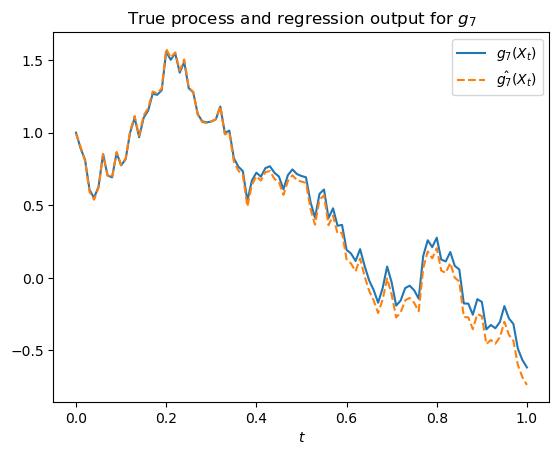

In [81]:
plt.plot(x_axis, target_4)
plt.plot(x_axis, Y_pred_4, "--")
plt.title("True process and regression output for $g_{7}$")
plt.xlabel("$t$")
plt.gca().legend(("$g_{7}(X_t)$", "$\hat{g_{7}}(X_t)$"))
plt.show()